<a href="https://colab.research.google.com/github/joaotinti75/Machine-Learning/blob/main/Aula_LBPH_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reconhecimento de faces

In [1]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile

path = '/content/drive/MyDrive/yalefaces.zip'

zip_object = zipfile.ZipFile(file=path, mode='r')

zip_object.extractall('./')

zip_object.close()

In [3]:
import os

In [4]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for path in paths:
    imagem = Image.open(path).convert('L') #Converte as imagens para a escala de cinza
    imagem_np = np.array(imagem, 'uint8') #uint8 é uma matriz com apenas números inteiros
    id = int(path.split('.')[0][-2:])
    ids.append(id)
    faces.append(imagem_np) 

  return np.array(ids), faces


In [5]:
ids, faces = get_image_data()

In [6]:
print(ids)

[13 10  9 11 10  4  7 12  6 15  9  5 10  5  8 11  1 10 11  4 14  6  8  3
 10  5 14 10 14  9  1  7 13  2  4  4  7  5  6  7  4 15  2  8 10  2 11 10
  1  7 15  2 14  7 11  3  9 13  9  5  1  2  3 11  9 13  8  3  2  9 15  4
 14  6 11 14  9 14 10  8  3 15  8  6  5 13  7  1  2  6  6 13  3 12 14  5
  3 12  4  7  5  8  9 12 12 12 15 12 11  3 13  8 15  4  2  3  1  4 15  2
 15  6  7  6  1 12 13  1 13  8 12 11 14  1  5]


In [7]:
len(ids)

135

In [8]:
len(faces)

135

In [9]:
faces[0], faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 201, 195, 199],
        [255, 255, 255, ..., 218, 211, 217],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), (243, 320))

## Treinando o classificador LBPH

In [10]:
# radius = 1
# neighbors = 8
# grid_x = 8
# grid_y = 8

lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14, grid_x=9, grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

## Reconhecimento de faces

In [11]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [12]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

In [13]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [14]:
imagem_np.shape

(243, 320)

In [15]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao
#posicao 0 => classe prevista
#posicao 1 => confiança da detecção (quanto maior o valor, maior a confiança)

(10, 36.84750735484425)

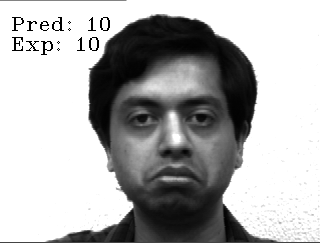

In [16]:
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(imagem_np, 'Exp: ' + str(10), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(imagem_np)

## Avaliação do classificador

In [17]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []
saidas_esperadas = []

for path in paths:
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')

  previsao, _ = lbph_face_classifier.predict(imagem_np)
  saida_esperada = int(path.split('.')[0][-2:])
  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)
  


In [18]:
type(previsoes), type(saidas_esperadas)

(list, list)

In [19]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [20]:
type(previsoes), type(saidas_esperadas)

(numpy.ndarray, numpy.ndarray)

In [21]:
previsoes

array([ 4,  7,  4, 12, 14,  5,  6,  7, 13,  4,  3,  9, 14,  4, 10, 13,  4,
       12,  4,  8, 11, 11,  3,  5, 15,  9, 14,  7, 12,  1])

In [22]:
saidas_esperadas

array([ 4,  9,  4, 12, 14,  5,  6, 15, 13,  1,  3,  9, 14,  8, 10, 13, 10,
        2,  2,  8, 11, 11,  3,  5, 15,  7,  6,  7, 12,  1])

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(saidas_esperadas, previsoes) #taxa de acerto = 66,6%


0.7

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

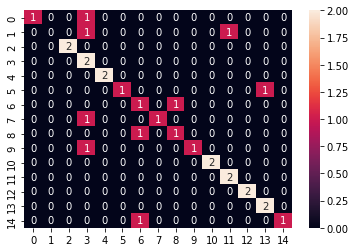

In [25]:
import seaborn
seaborn.heatmap(cm, annot=True); #annot=True mostra os valores